Github: https://github.com/e-barrett

In [1]:
### Assignment activity 3: Analyse customer sentiments with reviews

### What is the general sentiment of customers across all products?
### Based on the polarity of the sentiment, what are the top 20 positive and top 20 negative reviews?

In [2]:
#Import all the necessary packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('words')
from nltk.corpus import words
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/erinbarrett/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/erinbarrett/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
# Read the '.csv' file.
data3 = pd.read_csv('game_reviews.csv') 

# Print the table.
data3.head() 

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN


In [4]:
# More info about the DataFrame.
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         15000 non-null  int64 
 1   verified        15000 non-null  bool  
 2   reviewTime      15000 non-null  object
 3   reviewerID      15000 non-null  object
 4   reviewerName    15000 non-null  object
 5   reviewText      14990 non-null  object
 6   summary         14998 non-null  object
 7   unixReviewTime  15000 non-null  int64 
 8   image           160 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 952.3+ KB


In [5]:
# Prints descriptive statistics.
data3.describe() 

,overall,unixReviewTime
count,15000.000000,1.500000e+04
mean,4.574933,1.414857e+09
std,0.941795,7.449511e+07
min,1.000000,9.391680e+08
25%,5.000000,1.379527e+09
50%,5.000000,1.421366e+09
75%,5.000000,1.467677e+09
max,5.000000,1.525306e+09


In [6]:
#Look at the whole dataframe to get an idea of the data
pd.set_option('display.max_rows', None)

In [7]:
#Looked at all of data, just data3.head(5) left here to decrease file size
data3.head(5)

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN


In [8]:
# Check shape pre cutting of df
data3.shape

(15000, 9)

In [9]:
# Cut "False"/Unverified reviews:
data3 = data3[data3['verified'] == True] 
data3.shape

(13176, 9)

In [10]:
# Drop irrelevant columns
data3.dropna(subset=['reviewText','summary'], inplace=True)
data3.shape

(13166, 9)

In [11]:
# Set column width to max
pd.set_option("max_colwidth", None)

In [12]:
# Check column width
data3.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are filled with a general Forgotten Realms map is beyond me. Most of one of them is all blue ocean. Such a waste.\n\nI don't understand why they can't make these DM Screens more useful for these ""kinds of adventures"" rather than solely the specific adventure. You're supposed to be able to transpose this adventure to other lands outside the Forgotten Realms. So even just a list of new monsters or NPCs would at least be useful than the map. Even more would just be stuff related to running the game but broad-use stuff related to giants.\n\nSame thing with Curse of Strahd. Why not make it useful for raven loft, undead or horror campaigns in general... instead a huge amount of screen space is solely mapping out Castle Ravenloft, which is only useful during a small fraction of the time even for the Curse of Strahd adventure, let alone various other Ravenloft adventuring.\n\nThey really kill the extended use of these screens by not thinking about their potential use, both for the adventure in question, as well as use in a broader sense.\n\nThe Rage of Demons screen is far more useful for broad under dark adventuring - covering a lot of rules for the various conditions you may suffer... and the map is only one panel.\n\nThis Storm Giants one is decent for a few tables it includes - but really misses the mark. Maybe they should ask a few DMs what they would use?","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new dm and it's perfect!,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,"As my review of GF9's previous screens these were completely unnecessary and nearly useless. Skip them, this is the definition of a waste of money.",Money trap,1486512000,NaN
5,5,True,"01 27, 2017",A1J86V48S4KRJE,Cynthia A. Evoniuk,Grandson loves,Five Stars,1485475200,NaN
7,5,True,"12 17, 2016",A2UKOWP9ICU416,anon9df0,Came in perfect condition.,Five Stars,1481932800,NaN


In [13]:
# Isolate the textual variable
df_text = data3[['reviewText']].copy()

In [14]:
# View head of df
df_text.head()

,reviewText
2,"Nice art, nice printing. Why two panels are filled with a general Forgotten Realms map is beyond me. Most of one of them is all blue ocean. Such a waste.\n\nI don't understand why they can't make these DM Screens more useful for these ""kinds of adventures"" rather than solely the specific adventure. You're supposed to be able to transpose this adventure to other lands outside the Forgotten Realms. So even just a list of new monsters or NPCs would at least be useful than the map. Even more would just be stuff related to running the game but broad-use stuff related to giants.\n\nSame thing with Curse of Strahd. Why not make it useful for raven loft, undead or horror campaigns in general... instead a huge amount of screen space is solely mapping out Castle Ravenloft, which is only useful during a small fraction of the time even for the Curse of Strahd adventure, let alone various other Ravenloft adventuring.\n\nThey really kill the extended use of these screens by not thinking about their potential use, both for the adventure in question, as well as use in a broader sense.\n\nThe Rage of Demons screen is far more useful for broad under dark adventuring - covering a lot of rules for the various conditions you may suffer... and the map is only one panel.\n\nThis Storm Giants one is decent for a few tables it includes - but really misses the mark. Maybe they should ask a few DMs what they would use?"
3,Amazing buy! Bought it as a gift for our new dm and it's perfect!
4,"As my review of GF9's previous screens these were completely unnecessary and nearly useless. Skip them, this is the definition of a waste of money."
5,Grandson loves
7,Came in perfect condition.


In [15]:
# Tranform data to lowercase.
df_text['reviewText'] = df_text['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# Preview the results
df_text['reviewText'].head()

2    nice art, nice printing. why two panels are filled with a general forgotten realms map is beyond me. most of one of them is all blue ocean. such a waste. i don't understand why they can't make these dm screens more useful for these "kinds of adventures" rather than solely the specific adventure. you're supposed to be able to transpose this adventure to other lands outside the forgotten realms. so even just a list of new monsters or npcs would at least be useful than the map. even more would just be stuff related to running the game but broad-use stuff related to giants. same thing with curse of strahd. why not make it useful for raven loft, undead or horror campaigns in general... instead a huge amount of screen space is solely mapping out castle ravenloft, which is only useful during a small fraction of the time even for the curse of strahd adventure, let alone various other ravenloft adventuring. they really kill the extended use of these screens by not thinking about their pote

In [16]:
# Remove punctuation
df_text['reviewText'] = df_text['reviewText'].str.replace('[^\w\s]','')
df_text['reviewText'].head()

<ipython-input-16-1918bd1432ef>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text['reviewText'] = df_text['reviewText'].str.replace('[^\w\s]','')


2    nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the 

In [17]:
# Check df for duplicates
df_text.reviewText.duplicated().sum()

857

In [18]:
# Drop duplicated
df_text = df_text.drop_duplicates(subset=['reviewText'])
df_text.reset_index(inplace=True)
df_text.reviewText.duplicated().sum()

0

In [19]:
# Tokenize the words
df_text['tokens'] = df_text['reviewText'].apply(word_tokenize)
# Preview the results
df_text['tokens'].head()

0    [nice, art, nice, printing, why, two, panels, are, filled, with, a, general, forgotten, realms, map, is, beyond, me, most, of, one, of, them, is, all, blue, ocean, such, a, waste, i, dont, understand, why, they, cant, make, these, dm, screens, more, useful, for, these, kinds, of, adventures, rather, than, solely, the, specific, adventure, youre, supposed, to, be, able, to, transpose, this, adventure, to, other, lands, outside, the, forgotten, realms, so, even, just, a, list, of, new, monsters, or, npcs, would, at, least, be, useful, than, the, map, even, more, would, just, be, stuff, related, to, running, the, game, but, broaduse, ...]
1                                                                                                                                                                                                                                                                                                                                                              

In [20]:
# Set the colour palette.
sns.set(color_codes=True)
# Create a WordCloud object.
text = df_text['tokens'] 
word_cloud1 = WordCloud(width = 1600, height = 900,
                      background_color = 'white',
                      colormap = 'hsv',
                      stopwords = 'none',
                      min_font_size = 10).generate(str(text))

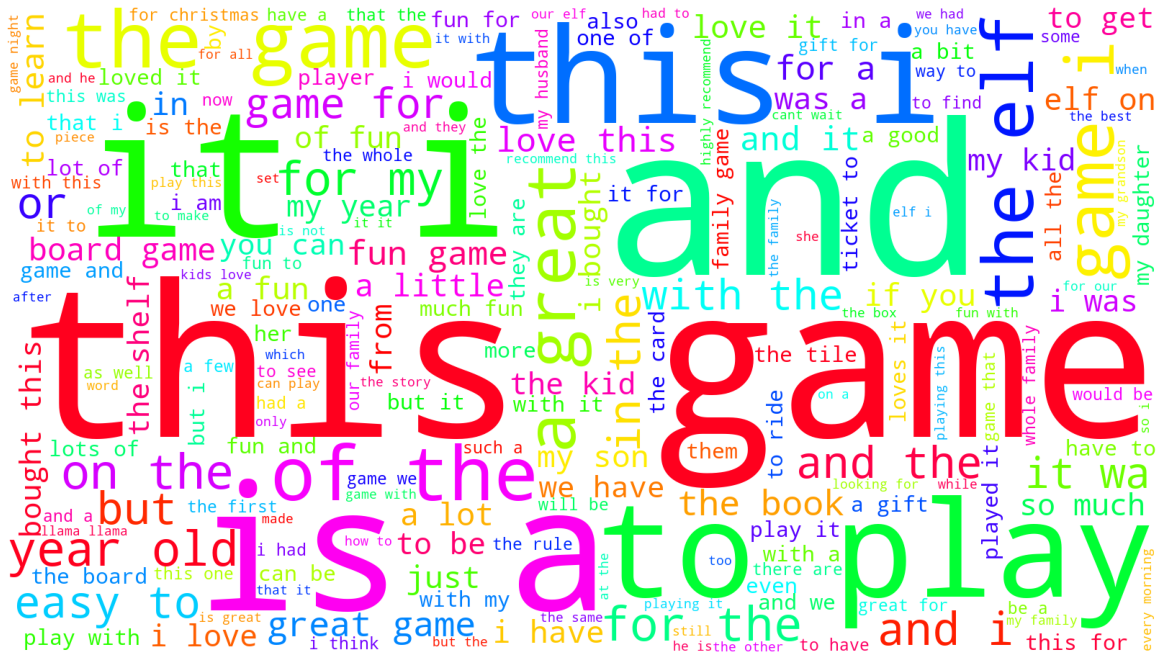

In [21]:
# Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(word_cloud1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [22]:
# Import stopwords and set to English
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/erinbarrett/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
#Import stopwords from wordcloud
from wordcloud import STOPWORDS

In [24]:
# Create a WordCloud without stop words
# Set the colour palette.
sns.set(color_codes=True)
# Plot the words on a word cloud
text = df_text['tokens'] 
word_cloud2 = WordCloud(width = 1600,height = 900,
                      background_color = 'black',
                      colormap = 'hsv',
                      stopwords = STOPWORDS,
                      min_font_size = 10).generate(str(text))

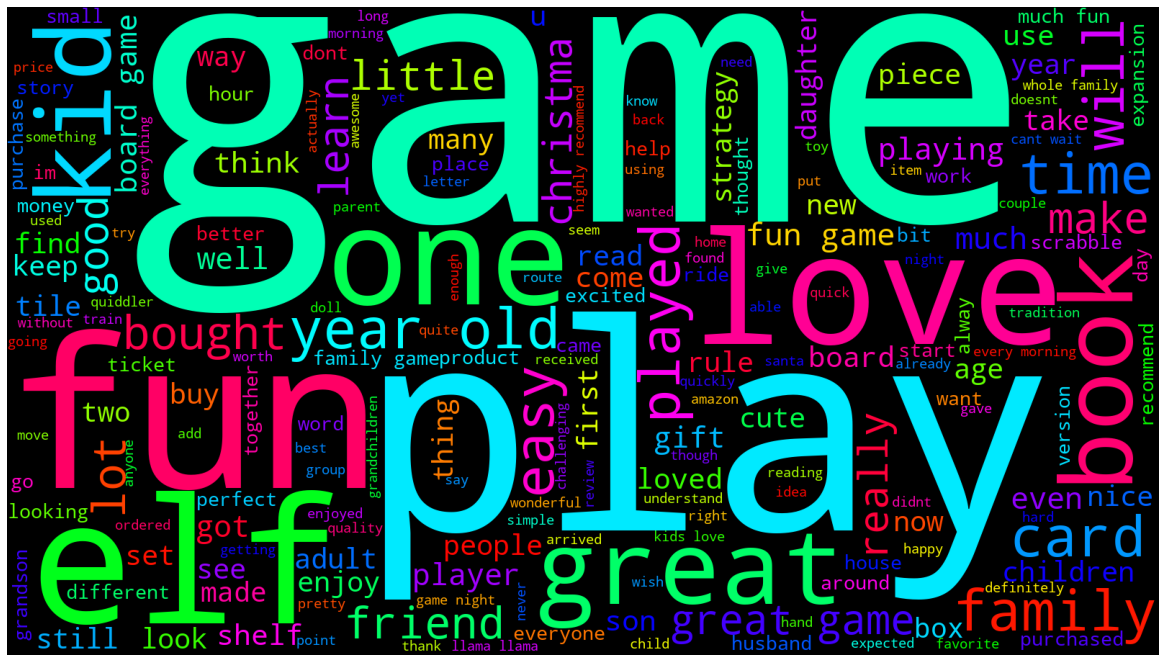

In [25]:
# Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(word_cloud2)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Save plot
word_cloud2.to_file('wordcloud_reviews.png')

In [26]:
# Define an empty list of tokens.
all_tokens = []
for i in range(df_text.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + df_text['tokens'][i]

In [27]:
# Calculate the frequency distribution
fdist = FreqDist(all_tokens)
fdist

FreqDist({'the': 22676, 'to': 15643, 'and': 15340, 'a': 13312, 'it': 11842, 'i': 9633, 'game': 9409, 'this': 9341, 'is': 8660, 'for': 8347, ...})

In [28]:
# Create new list
tokens1 = [word for word in all_tokens if word.isalnum()]

In [29]:
# Download the stop word list
nltk.download('stopwords')
from nltk.corpus import stopwords
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))
# Create a filtered list of tokens without stop words.
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]
# Define an empty string variable.
tokens2_string = ''
for value in tokens2:
    #Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ''

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/erinbarrett/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# Calculate frequency of words from token list
fdist1 = FreqDist(tokens2)
fdist1

FreqDist({'game': 9409, 'fun': 4252, 'great': 3471, 'play': 3163, 'elf': 2598, 'love': 2567, 'family': 2335, 'one': 2149, 'kids': 2024, 'year': 1655, ...})

In [31]:
# Import the Counter class
from collections import Counter
# Generate a DataFrame from Counter
counts = pd.DataFrame(Counter(tokens2).most_common(30),
                     columns=['Word', 'Frequency']).set_index('Word')
# Display the result
counts

,Frequency
Word,
game,9409
fun,4252
great,3471
play,3163
elf,2598
love,2567
family,2335
one,2149
kids,2024


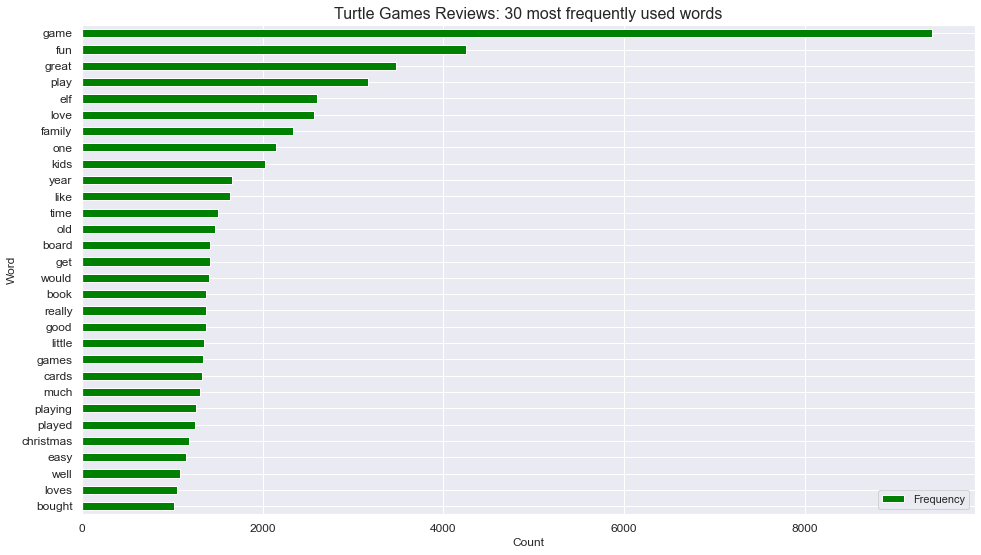

In [32]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16,9), fontsize=12, color = 'green')
plt.gca().invert_yaxis()
# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title('Turtle Games Reviews: 30 most frequently used words', fontsize=16)

# Save plot
plt.savefig("top_30_words.png", dpi=300)

In [33]:
# Install TextBlob
!pip install textblob

# Import
from textblob import TextBlob

In [34]:
# Define a function to extract a polarity score for the reviews
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each review
data3['polarity'] = data3['reviewText'].apply(generate_polarity)

# Preview the results
data3['polarity'].head()

2    0.116640
3    0.628788
4   -0.316667
5    0.000000
7    1.000000
Name: polarity, dtype: float64

In [35]:
# Check summary of the polarity
data3['polarity'].describe()

count    13166.000000
mean         0.239469
std          0.273003
min         -1.000000
25%          0.050186
50%          0.200000
75%          0.392768
max          1.000000
Name: polarity, dtype: float64

<AxesSubplot:xlabel='polarity', ylabel='Count'>

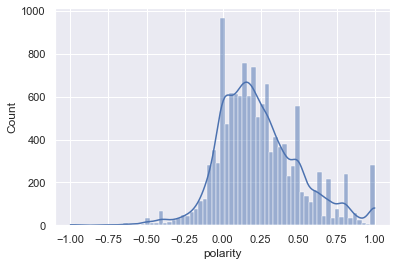

In [36]:
# Plot the polarity with histogram and kde
sns.histplot(data=data3, x='polarity', kde=True)

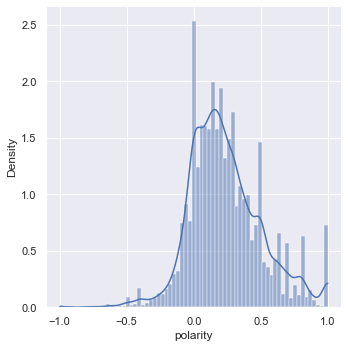

In [37]:
# Plot the polarity with distribution plot, kde and density
sns.displot(data=data3, x='polarity', kde=True, stat="density")

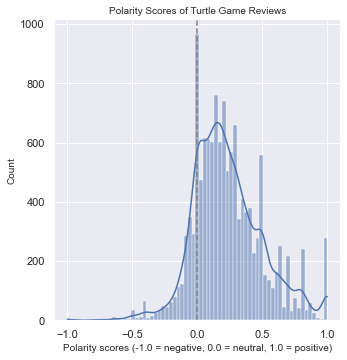

In [38]:
# Plot the polarity with distribution plot and kde with labels 
sns.displot(data=data3, x='polarity', kde=True)
plt.axvline(0, 0,1150, color = 'grey', linestyle='--')
plt.title('Polarity Scores of Turtle Game Reviews', fontsize=10)
plt.xlabel('Polarity scores (-1.0 = negative, 0.0 = neutral, 1.0 = positive)', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Save plot
plt.savefig("polarity_reviews.png", dpi=300)

In [39]:
# Isolate the textual variable
reviews = data3[['reviewText', 'polarity']].copy()

In [40]:
# View head of df
reviews.head()

,reviewText,polarity
2,"Nice art, nice printing. Why two panels are filled with a general Forgotten Realms map is beyond me. Most of one of them is all blue ocean. Such a waste.\n\nI don't understand why they can't make these DM Screens more useful for these ""kinds of adventures"" rather than solely the specific adventure. You're supposed to be able to transpose this adventure to other lands outside the Forgotten Realms. So even just a list of new monsters or NPCs would at least be useful than the map. Even more would just be stuff related to running the game but broad-use stuff related to giants.\n\nSame thing with Curse of Strahd. Why not make it useful for raven loft, undead or horror campaigns in general... instead a huge amount of screen space is solely mapping out Castle Ravenloft, which is only useful during a small fraction of the time even for the Curse of Strahd adventure, let alone various other Ravenloft adventuring.\n\nThey really kill the extended use of these screens by not thinking about their potential use, both for the adventure in question, as well as use in a broader sense.\n\nThe Rage of Demons screen is far more useful for broad under dark adventuring - covering a lot of rules for the various conditions you may suffer... and the map is only one panel.\n\nThis Storm Giants one is decent for a few tables it includes - but really misses the mark. Maybe they should ask a few DMs what they would use?",0.116640
3,Amazing buy! Bought it as a gift for our new dm and it's perfect!,0.628788
4,"As my review of GF9's previous screens these were completely unnecessary and nearly useless. Skip them, this is the definition of a waste of money.",-0.316667
5,Grandson loves,0.000000
7,Came in perfect condition.,1.000000


In [41]:
# Get the top 20 positive reviews
pos_reviews_20 = reviews.sort_values('polarity', ascending=False).head(20)

# View df
pos_reviews_20

,reviewText,polarity
14361,Perfect,1.0
591,Wonderful product,1.0
9425,Perfect.,1.0
9436,kids love Elf on the shelf!!! this is a must for all familes!!,1.0
12391,Just wanted we needed to Begin the season! Great buy!,1.0
13324,Delightful- gift for age 4 granddaughter who liv,1.0
621,Wonderful for my grandson to learn the resurrection story.,1.0
620,Great Easter gift for kids!,1.0
8598,Arrived in awesome shape,1.0
8600,It was in perfect shape. Thank you,1.0


In [42]:
# Save df to .csv
pos_reviews_20.to_csv('top_20_pos_reviews.csv')

In [43]:
# Get the top 20 negative reviews
neg_reviews_20 = reviews.sort_values('polarity', ascending=True).head(20)

# View df
neg_reviews_20

,reviewText,polarity
8319,Awful. We did not receive what was advertised. We paid $30 for the boxes set with book. We got the elf in a bag without the book.,-1.00000
208,BOOO UNLES YOU ARE PATIENT KNOW HOW TO MEASURE I DIDN'T HAVE THE PATIENCE NEITHER DID MY DAUGHTER. BORING UNLESS YOU ARE A CRAFT PERSON WHICH I AM NOT.,-1.00000
3359,some of the suggestions are disgusting,-1.00000
2043,Kids did not like it. Thought it was boring.,-1.00000
8788,Going to be a crazy Christmas at our house this year!!!!,-1.00000
9511,I haven't even taken it out of the box yet but it's already falling apart. I contacted customer service and never even got a response. I am very disappointed in this product.,-0.97500
7988,Was the elf on the shelf but it didn't have the DVD I was very disappointed,-0.97500
182,Incomplete kit! Very disappointing!,-0.97500
14988,It is not waterproof and is dangerous!!,-0.93750
9260,Just stupid.,-0.80000


In [44]:
# Save df to .csv
neg_reviews_20.to_csv('top_20_neg_reviews.csv')

In [45]:
# Get more positive reviews
pos_reviews_over80percent = reviews.loc[reviews['polarity'] > 0.8]

In [46]:
# More info on new df
pos_reviews_over80percent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 7 to 14979
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewText  433 non-null    object 
 1   polarity    433 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.1+ KB


In [47]:
# View df head
pos_reviews_over80percent.head()

,reviewText,polarity
7,Came in perfect condition.,1.0000
27,Beautiful art work,0.8500
44,Absolutely great pictures even before coloring!,1.0000
55,Great!,1.0000
65,Very Cute!,0.8125


In [48]:
# Save df to .csv
pos_reviews_over80percent.to_csv('pos_reviews_over80percent.csv')

In [49]:
# Get more negative reviews
neg_reviews_overneg20percent = reviews.loc[reviews['polarity'] < -0.2]

In [50]:
# More info on new df
neg_reviews_overneg20percent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 4 to 14995
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewText  359 non-null    object 
 1   polarity    359 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.4+ KB


In [51]:
# View df head
neg_reviews_overneg20percent.head()

,reviewText,polarity
4,"As my review of GF9's previous screens these were completely unnecessary and nearly useless. Skip them, this is the definition of a waste of money.",-0.316667
93,This is a small book,-0.250000
117,I bought this as a Christmas gift for my grandson. Its a sticker book. So how can I go wrong with this gift.,-0.500000
174,"I sent this product to my granddaughter. The pom-pom maker comes in two parts and is supposed to snap together to create the pom-poms. However, both parts were the same making it unusable. If you can't make the pom-poms the kit is useless. Since this was sent as a gift, I do not have it to return. Very disappointed.",-0.491667
178,"At age 31 I found these very difficult to make, I can't imagine how an 8 year old would do it by themselves.",-0.275000


In [52]:
# Save df to .csv
neg_reviews_overneg20percent.to_csv('neg_reviews_overneg20percent.csv')